In [1]:
import pandas as pd
import env
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import wrangle
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans

# Acquire

In [2]:
df = wrangle.new_zillow_data()

# Prepare

In [3]:
df.shape

(52319, 68)

In [4]:
list(df.columns)

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [5]:
wrangle.null_counter(df).T

name,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
num_rows_missing,0,0,38704,52249,52272,0,0,52319,18665,135,51930,47948,81,246,52319,52319,47948,52154,0,45086,135,34335,34335,50805,18470,0,0,366,41242,51454,51876,51248,42329,0,0,18558,0,1036,0,33338,26,0,52272,45602,52243,18558,50384,52256,114,37787,52238,82,1,0,1,4,50251,50251,121,0,0,38704,52249,52319,18470,0,52272,52243
pct_rows_missing,0.0,0.0,0.739769,0.998662,0.999102,0.0,0.0,1.0,0.356754,0.00258,0.992565,0.916455,0.001548,0.004702,1.0,1.0,0.916455,0.996846,0.0,0.861752,0.00258,0.656263,0.656263,0.971062,0.353027,0.0,0.0,0.006996,0.78828,0.983467,0.991533,0.979529,0.809056,0.0,0.0,0.354709,0.0,0.019802,0.0,0.637206,0.000497,0.0,0.999102,0.871615,0.998547,0.354709,0.963015,0.998796,0.002179,0.722242,0.998452,0.001567,0.000019,0.0,0.000019,0.000076,0.960473,0.960473,0.002313,0.0,0.0,0.739769,0.998662,1.0,0.353027,0.0,0.999102,0.998547


In [3]:
df = wrangle.null_dropper(df, 0.75, 0.75)

In [6]:
df.shape

(52317, 29)

In [8]:
list(df.columns)

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'propertylandusedesc']

In [9]:
df.isna().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                133
calculatedfinishedsquarefeet      79
finishedsquarefeet12             244
fips                               0
fullbathcnt                      133
latitude                           0
longitude                          0
lotsizesquarefeet                364
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1034
regionidcounty                     0
regionidzip                       24
roomcnt                            0
yearbuilt                        112
structuretaxvaluedollarcnt        80
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              119
logerror                           0
t

In [4]:
df = df.dropna()

In [11]:
df.isna().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

In [7]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


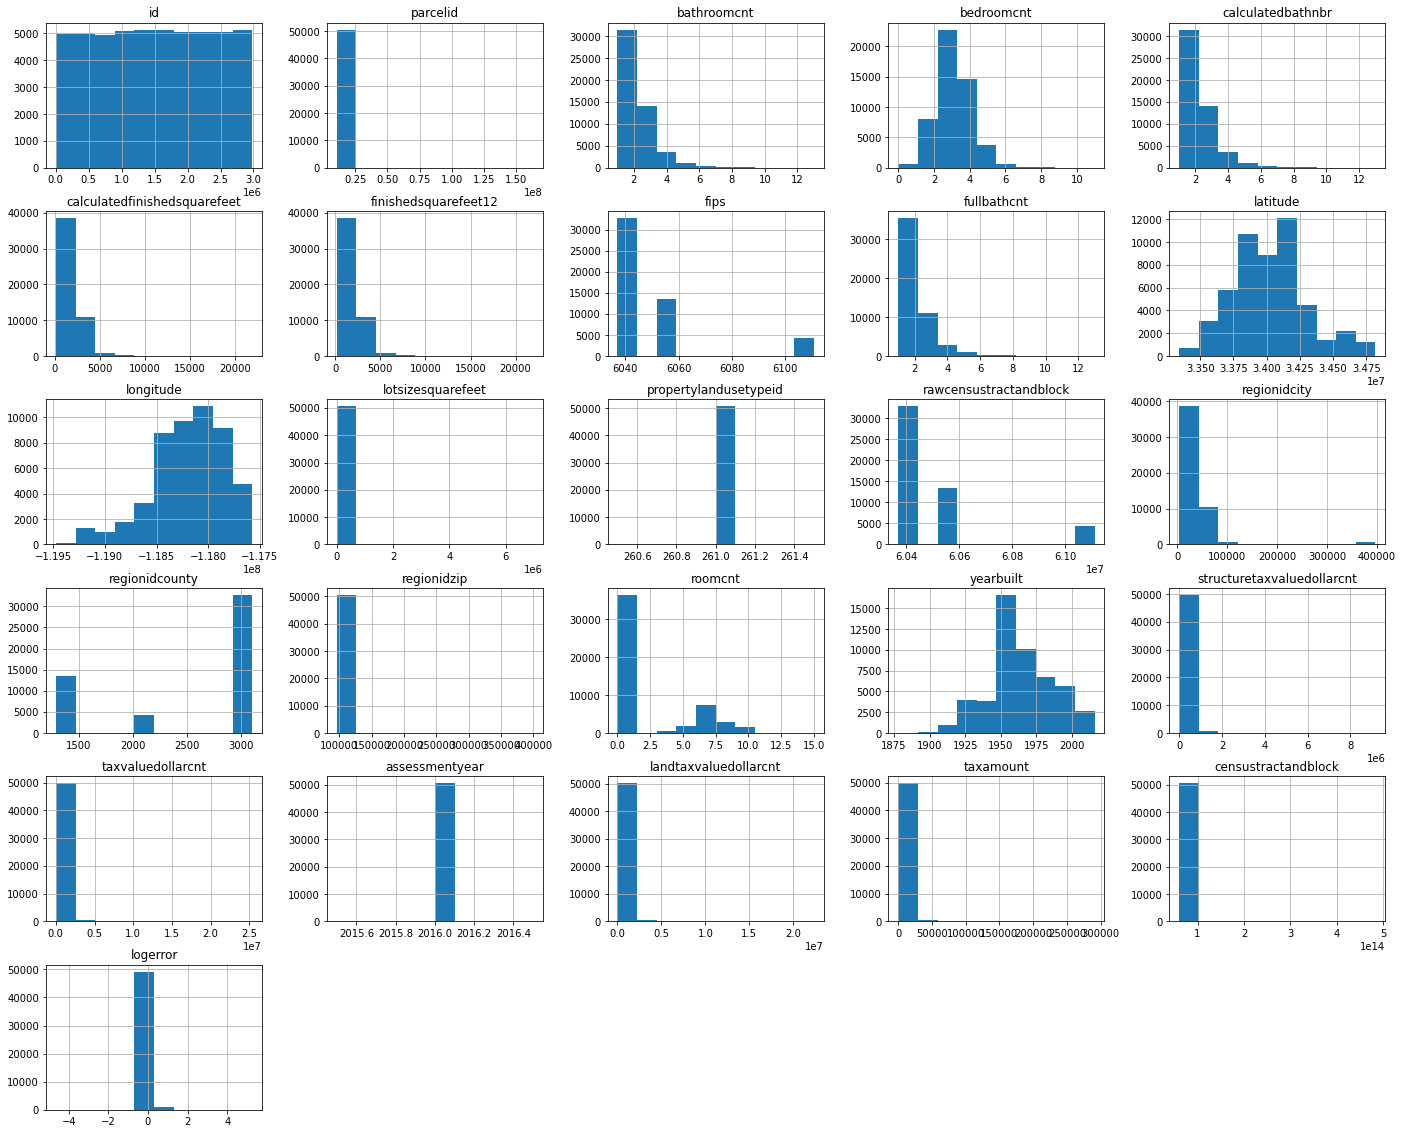

In [13]:
df.hist(figsize=(24, 20))
plt.show()

Redundant:
- finishedsqaurefeet12
- roomcnt
- censustractandblock
- landtaxvaluedollarcnt
- taxamount
- structuretaxvaluedollarcnt
- propertycountylandusecode

In [5]:
df = df.drop(columns=['finishedsquarefeet12', 'roomcnt', 'censustractandblock', 'landtaxvaluedollarcnt', 'taxamount', 'structuretaxvaluedollarcnt', 'propertycountylandusecode'])

In [6]:
df= df.drop(columns=['propertylandusetypeid'])

In [7]:
# Not necessary because I know these are all Single Family Residential
df = df.drop(columns=['propertylandusedesc'])

In [11]:
df.shape

(50559, 20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50559 entries, 0 to 52318
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            50559 non-null  int64  
 1   parcelid                      50559 non-null  int64  
 2   bathroomcnt                   50559 non-null  float64
 3   bedroomcnt                    50559 non-null  float64
 4   calculatedbathnbr             50559 non-null  float64
 5   calculatedfinishedsquarefeet  50559 non-null  float64
 6   fips                          50559 non-null  float64
 7   fullbathcnt                   50559 non-null  float64
 8   latitude                      50559 non-null  float64
 9   longitude                     50559 non-null  float64
 10  lotsizesquarefeet             50559 non-null  float64
 11  rawcensustractandblock        50559 non-null  float64
 12  regionidcity                  50559 non-null  float64
 13  r

In [8]:
# dropping this column since we have bathroomcnt, fullbathcnt, and I will make a half bath column
df = df.drop(columns=['calculatedbathnbr'])

In [13]:
df.shape

(50559, 19)

In [9]:
# creating a new column showing the number of half baths a house has
df['half_bath'] = (df.bathroomcnt - df.fullbathcnt)/0.5

In [11]:
df.half_bath

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52314    0.0
52315    0.0
52316    0.0
52317    0.0
52318    0.0
Name: half_bath, Length: 50559, dtype: float64

In [13]:
df.half_bath.value_counts()

0.0    43998
1.0     6484
2.0       68
3.0        8
7.0        1
Name: half_bath, dtype: int64

In [19]:
df.regionidcounty.value_counts()

3101.0    32739
1286.0    13500
2061.0     4320
Name: regionidcounty, dtype: int64

In [20]:
df.transactiondate.value_counts()

2017-06-30    779
2017-04-28    591
2017-05-31    549
2017-07-28    526
2017-08-31    514
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11      1
2017-09-25      1
Name: transactiondate, Length: 257, dtype: int64

In [10]:
df.rename(columns={'bedroomcnt':'bed', 'bathroomcnt':'bath', 'calculatedfinishedsquarefeet':'square_feet', 'fips':'county', 'lotsizesquarefeet':'lot_square_feet', 'regionidcity':'id_city', 'regionidcounty':'id_county', 'regionidzip':'id_zip', 'taxvaluedollarcnt':'appraisal'}, inplace = True)

In [11]:
df['county'].replace({6037.0: 'LA County', 6059.0: 'Orange County',
               6111.0: 'Ventura County'}, inplace=True)

In [16]:
df.columns

Index(['id', 'parcelid', 'bath', 'bed', 'square_feet', 'county', 'fullbathcnt',
       'latitude', 'longitude', 'lot_square_feet', 'rawcensustractandblock',
       'id_city', 'id_county', 'id_zip', 'yearbuilt', 'appraisal',
       'assessmentyear', 'logerror', 'transactiondate', 'half_bath'],
      dtype='object')

## Split

In [12]:
train, valid_test = train_test_split(df, test_size = 0.3, random_state = 123)

validate, test = train_test_split(valid_test, test_size = 0.5, random_state = 123)

In [13]:
print(train.shape, validate.shape, test.shape)

(35391, 20) (7584, 20) (7584, 20)


In [17]:
train.head(3)

,id,parcelid,bath,bed,square_feet,county,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,transactiondate,half_bath
12591,1151696,11281694,3.0,4.0,2338.0,LA County,3.0,34661359.0,-118159914.0,10152.0,6.037901e+07,5534.0,3101.0,97317.0,1969.0,214525.0,2016.0,0.084755,2017-03-21,0.0
2778,2104743,10847031,7.0,4.0,12039.0,LA County,7.0,34167197.0,-118434181.0,37630.0,6.037129e+07,12447.0,3101.0,96410.0,1992.0,3794515.0,2016.0,0.031378,2017-01-19,0.0
30932,1861487,14230822,2.0,3.0,1472.0,Orange County,2.0,33805416.0,-117827119.0,6200.0,6.059076e+07,33252.0,1286.0,97065.0,1960.0,488429.0,2016.0,-0.024276,2017-06-13,0.0


# Explore

### 1. How does log error compare between the three counties?

<AxesSubplot:>

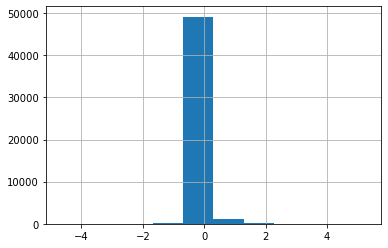

In [47]:
df.logerror.hist()

<AxesSubplot:>

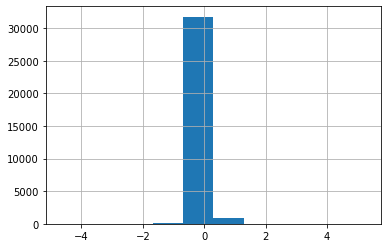

In [57]:
df.logerror[df.county == 'LA County'].hist()

<AxesSubplot:>

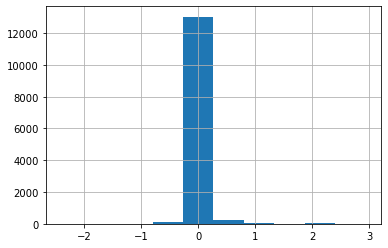

In [58]:
df.logerror[df.county == 'Orange County'].hist()

<AxesSubplot:>

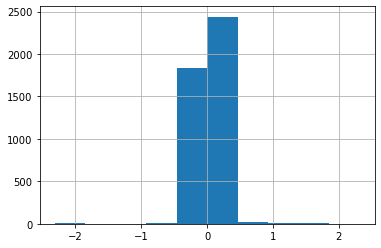

In [59]:
df.logerror[df.county == 'Ventura County'].hist()

It appears that the range of log error is more broad for Ventura County, i.e. The errors are larger in this county. 

In [66]:
avg_LA_logerror = df.logerror[df.county == 'LA County'].mean()
avg_Orange_logerror = df.logerror[df.county == 'Orange County'].mean()
avg_Ventura_logerror = df.logerror[df.county == 'Ventura County'].mean()

In [68]:
y = [avg_LA_logerror, avg_Orange_logerror, avg_Ventura_logerror]

In [69]:
x = ['LA County', 'Orange County', 'Ventura County']

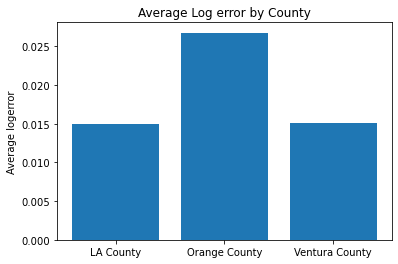

In [71]:
plt.bar(x, y)
plt.ylabel('Average logerror')
plt.title('Average Log error by County')
plt.show()

This chart shows that the average logerror is larger in Orange County. 

### Null Hypothesis:
- There is no significant difference between the county's logerrors.

### Alternative Hypothesis
- There is a statistically significant difference between the county's logerrors. 

In [14]:
# I am performing an ANOVA statistical test to see the significance of this chart.
from scipy import stats
alpha = 0.05

f, p = stats.f_oneway(df[df['county'] == 'LA County'].logerror,
                     df[df['county'] == 'Orange County'].logerror,
                     df[df['county'] == 'Ventura County'].logerror)

f, p

(22.529040531309715, 1.660043739931129e-10)

I reject the Null Hypothesis. 

### 2. How does size of a house affect logerror?

df.square_feet.hist()

In [85]:
y=[df.logerror[df.square_feet < 2500].mean(),
df.logerror[(df.square_feet >= 2500) & (df.square_feet < 5000)].mean(),
df.logerror[df.square_feet >= 5000].mean()]

In [86]:
x=['smedium', 'large', 'xl']

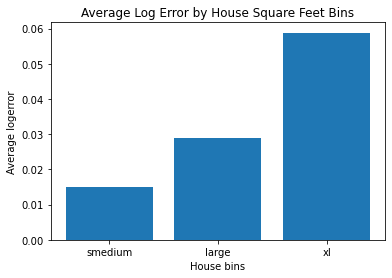

In [87]:
plt.bar(x, y)
plt.xlabel('House bins')
plt.ylabel('Average logerror')
plt.title('Average Log Error by House Square Feet Bins')
plt.show()

It appears that as the square footage of a house increases, so too does the average logerror. Interesting. 

### Null Hypothesis:
- There is no significant difference between the logerrors according to house square footage.

### Alternative Hypothesis
- There is a statistically significant difference between the logerrors according to house square footage. 

In [88]:
# I am performing an ANOVA statistical test to see the significance of this chart.
from scipy import stats
alpha = 0.05

f, p = stats.f_oneway(df[df['square_feet'] < 2500].logerror,
                     df[(df['square_feet'] >= 2500) & (df['square_feet'] < 5000)].logerror,
                     df[df['square_feet'] >= 5000].logerror)

f, p

(44.00700236584575, 8.028208895897534e-20)

I reject the Null Hypothesis.

 ### 3. How does year built affect logerror?

<AxesSubplot:>

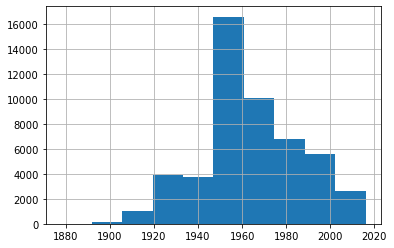

In [89]:
df.yearbuilt.hist()

In [90]:
y=[df.logerror[df.yearbuilt < 1950].mean(),
df.logerror[(df.yearbuilt >= 1950) & (df.square_feet < 1980)].mean(),
df.logerror[df.yearbuilt >= 1980].mean()]

In [93]:
x = ['Before 1950', '1950-1979', '1980-Present']

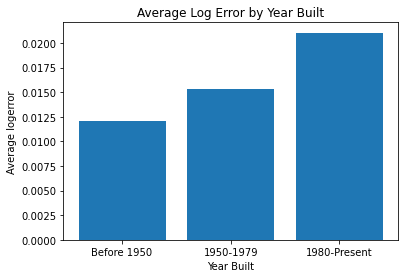

In [94]:
plt.bar(x, y)
plt.xlabel('Year Built')
plt.ylabel('Average logerror')
plt.title('Average Log Error by Year Built')
plt.show()

Interestingly, it appears that the older houses have a smaller logerror on average. I would have predicted it to be the other way around. 

### Null Hypothesis:
- There is no significant difference between the logerrors according to year built. 

### Alternative Hypothesis
- There is a statistically significant difference between the logerrors according to year built.

In [95]:
# I am performing an ANOVA statistical test to see the significance of this chart.
alpha = 0.05

f, p = stats.f_oneway(df[df['yearbuilt'] < 1950].logerror,
                     df[(df['yearbuilt'] >= 1950) & (df['yearbuilt'] < 1980)].logerror,
                     df[df['yearbuilt'] >= 1980].logerror)

f, p

(9.361556106866363, 8.611533662895507e-05)

I reject the Null Hypothesis.

### 4. How does the number of half baths affect log error?

<AxesSubplot:>

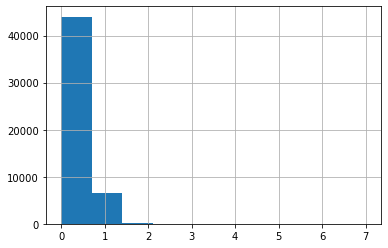

In [96]:
df.half_bath.hist()

In [97]:
df.half_bath.value_counts()

0.0    43998
1.0     6484
2.0       68
3.0        8
7.0        1
Name: half_bath, dtype: int64

In [98]:
y=[df.logerror[df.half_bath == 0.0].mean(),
df.logerror[(df.half_bath >= 1.0) & (df.half_bath < 2.0)].mean(),
df.logerror[df.half_bath >= 2.0].mean()]

In [99]:
x = ['None', 'One', 'Two of more']

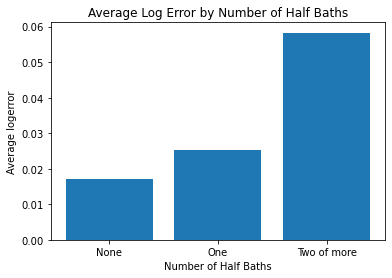

In [100]:
plt.bar(x, y)
plt.xlabel('Number of Half Baths')
plt.ylabel('Average logerror')
plt.title('Average Log Error by Number of Half Baths')
plt.show()

It appears that as the number of half baths increases, so too does the average log error.

### Null Hypothesis:
- There is no significant difference between the logerrors according to the number of half baths. 

### Alternative Hypothesis
- There is a statistically significant difference between the logerrors according to the number of half baths.

In [101]:
# I am performing an ANOVA statistical test to see the significance of this chart.
alpha = 0.05

f, p = stats.f_oneway(df[df['half_bath'] == 0.0].logerror,
                     df[(df['half_bath'] >= 1.0) & (df['half_bath'] < 2.0)].logerror,
                     df[df['half_bath'] >= 2.0].logerror)

f, p

(8.537515866678534, 0.0001962591771208839)

I reject the Null Hypothesis. 

## Clustering

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35391 entries, 12591 to 16271
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      35391 non-null  int64  
 1   parcelid                35391 non-null  int64  
 2   bath                    35391 non-null  float64
 3   bed                     35391 non-null  float64
 4   square_feet             35391 non-null  float64
 5   county                  35391 non-null  object 
 6   fullbathcnt             35391 non-null  float64
 7   latitude                35391 non-null  float64
 8   longitude               35391 non-null  float64
 9   lot_square_feet         35391 non-null  float64
 10  rawcensustractandblock  35391 non-null  float64
 11  id_city                 35391 non-null  float64
 12  id_county               35391 non-null  float64
 13  id_zip                  35391 non-null  float64
 14  yearbuilt               35391 non-

In [15]:
dummies_train = pd.get_dummies(train.county)
dummies_validate = pd.get_dummies(validate.county)
dummies_test = pd.get_dummies(test.county)

In [16]:
train = pd.concat([train, dummies_train], axis = 1)
validate = pd.concat([validate, dummies_validate], axis = 1)
test = pd.concat([test, dummies_test], axis = 1)

In [17]:
train.drop(columns=['county'], inplace = True)
validate.drop(columns=['county'], inplace = True)
test.drop(columns=['county'], inplace = True)

In [18]:
train.drop(columns=['transactiondate'], inplace=True)
validate.drop(columns=['transactiondate'], inplace=True)
test.drop(columns=['transactiondate'], inplace=True)

In [24]:
train.head(1)

,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County
12591,1151696,11281694,3.0,4.0,2338.0,3.0,34661359.0,-118159914.0,10152.0,6.037901e+07,5534.0,3101.0,97317.0,1969.0,214525.0,2016.0,0.084755,0.0,1,0,0


In [25]:
'''y_train = train.logerror
y_validate = validate.logerror
y_test = test.logerror

x_train = train.drop(columns=['logerror'])
x_validate = validate.drop(columns=['logerror'])
x_test = test.drop(columns=['logerror'])
'''

In [19]:
# train
scaler = MinMaxScaler()

scaler.fit(train[['bath', 'bed', 'square_feet', 'fullbathcnt', 'lot_square_feet', 'yearbuilt', 'appraisal', 'half_bath']])

train_scaled = scaler.transform(train[['bath', 'bed', 'square_feet', 'fullbathcnt', 'lot_square_feet', 'yearbuilt', 'appraisal', 'half_bath']])

In [20]:
# validate
scaler = MinMaxScaler()

scaler.fit(validate[['bath', 'bed', 'square_feet', 'fullbathcnt', 'lot_square_feet', 'yearbuilt', 'appraisal', 'half_bath']])

validate_scaled = scaler.transform(validate[['bath', 'bed', 'square_feet', 'fullbathcnt', 'lot_square_feet', 'yearbuilt', 'appraisal', 'half_bath']])

In [21]:
# test
scaler = MinMaxScaler()

scaler.fit(test[['bath', 'bed', 'square_feet', 'fullbathcnt', 'lot_square_feet', 'yearbuilt', 'appraisal', 'half_bath']])

test_scaled = scaler.transform(test[['bath', 'bed', 'square_feet', 'fullbathcnt', 'lot_square_feet', 'yearbuilt', 'appraisal', 'half_bath']])

In [22]:
train_scaled

array([[0.16666667, 0.36363636, 0.09673106, ..., 0.65942029, 0.00832497,
        0.        ],
       [0.5       , 0.36363636, 0.54400848, ..., 0.82608696, 0.14939166,
        0.        ],
       [0.08333333, 0.27272727, 0.05680299, ..., 0.5942029 , 0.01911794,
        0.        ],
       ...,
       [0.25      , 0.36363636, 0.17059339, ..., 0.63043478, 0.09168171,
        0.        ],
       [0.08333333, 0.36363636, 0.05283784, ..., 0.61594203, 0.01437781,
        0.        ],
       [0.125     , 0.45454545, 0.09889806, ..., 0.63768116, 0.02803484,
        0.14285714]])

In [29]:
validate_scaled

,bath_scaled,bed_scaled,square_feet_scaled,fullbathcnt_scaled,lot_square_feet_scaled,yearbuilt_scaled,appraisal_scaled,half_bath_scaled,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County
44197,0.000000,0.222222,0.073761,0.000000,0.000637,0.488722,0.010455,0.0,2393021,12302820,1.0,2.0,1126.0,1.0,33940750.0,-118220611.0,4678.0,6.037536e+07,47762.0,3101.0,96125.0,1947.0,265150.0,2016.0,0.016056,0.0,1,0,0
43461,0.111111,0.333333,0.123141,0.111111,0.000823,0.578947,0.012338,0.0,1823556,11418342,2.0,3.0,1687.0,2.0,33921192.0,-118356806.0,5972.0,6.037602e+07,42150.0,3101.0,96107.0,1959.0,310048.0,2016.0,0.137172,0.0,1,0,0
19399,0.333333,0.444444,0.319338,0.333333,0.001257,0.917293,0.032594,0.0,2414836,17263461,4.0,4.0,3916.0,4.0,34263747.0,-118682712.0,8998.0,6.111008e+07,27110.0,2061.0,97116.0,2004.0,793000.0,2016.0,0.036370,0.0,0,0,1
50533,0.111111,0.444444,0.097879,0.111111,0.000683,0.676692,0.018402,0.0,1399441,14372753,2.0,4.0,1400.0,2.0,33634590.0,-117686058.0,5000.0,6.059052e+07,32380.0,1286.0,96962.0,1972.0,454616.0,2016.0,0.032161,0.0,0,1,0
24891,0.444444,0.555556,0.362908,0.444444,0.006231,0.924812,0.018626,0.0,372156,11239786,5.0,5.0,4411.0,5.0,34542642.0,-118118287.0,43672.0,6.037910e+07,40227.0,3101.0,97328.0,2005.0,459958.0,2016.0,0.017489,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,0.111111,0.333333,0.080979,0.111111,0.001001,0.646617,0.018963,0.0,2827582,12851382,2.0,3.0,1208.0,2.0,33979491.0,-117887986.0,7211.0,6.037409e+07,22827.0,3101.0,96492.0,1968.0,468000.0,2016.0,0.182098,0.0,1,0,0
19827,0.111111,0.444444,0.129830,0.111111,0.006198,0.781955,0.002164,0.0,1793250,11242226,2.0,4.0,1763.0,2.0,34494908.0,-118159875.0,43444.0,6.037911e+07,16677.0,3101.0,97298.0,1986.0,67465.0,2016.0,-0.026999,0.0,1,0,0
50376,0.111111,0.333333,0.076226,0.111111,0.000986,0.578947,0.007390,0.0,2248404,14063188,2.0,3.0,1154.0,2.0,33696326.0,-117984848.0,7110.0,6.059099e+07,25218.0,1286.0,96964.0,1959.0,192067.0,2016.0,0.058211,0.0,0,1,0
28971,0.111111,0.333333,0.137488,0.111111,0.001322,0.578947,0.016245,0.0,2806016,11053574,2.0,3.0,1850.0,2.0,34230420.0,-118477226.0,9449.0,6.037117e+07,12447.0,3101.0,96369.0,1959.0,403194.0,2016.0,-0.002942,0.0,1,0,0


In [24]:
validate

,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County
44197,2393021,12302820,1.0,2.0,1126.0,1.0,33940750.0,-118220611.0,4678.0,6.037536e+07,47762.0,3101.0,96125.0,1947.0,265150.0,2016.0,0.016056,0.0,1,0,0
43461,1823556,11418342,2.0,3.0,1687.0,2.0,33921192.0,-118356806.0,5972.0,6.037602e+07,42150.0,3101.0,96107.0,1959.0,310048.0,2016.0,0.137172,0.0,1,0,0
19399,2414836,17263461,4.0,4.0,3916.0,4.0,34263747.0,-118682712.0,8998.0,6.111008e+07,27110.0,2061.0,97116.0,2004.0,793000.0,2016.0,0.036370,0.0,0,0,1
50533,1399441,14372753,2.0,4.0,1400.0,2.0,33634590.0,-117686058.0,5000.0,6.059052e+07,32380.0,1286.0,96962.0,1972.0,454616.0,2016.0,0.032161,0.0,0,1,0
24891,372156,11239786,5.0,5.0,4411.0,5.0,34542642.0,-118118287.0,43672.0,6.037910e+07,40227.0,3101.0,97328.0,2005.0,459958.0,2016.0,0.017489,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,2827582,12851382,2.0,3.0,1208.0,2.0,33979491.0,-117887986.0,7211.0,6.037409e+07,22827.0,3101.0,96492.0,1968.0,468000.0,2016.0,0.182098,0.0,1,0,0
19827,1793250,11242226,2.0,4.0,1763.0,2.0,34494908.0,-118159875.0,43444.0,6.037911e+07,16677.0,3101.0,97298.0,1986.0,67465.0,2016.0,-0.026999,0.0,1,0,0
50376,2248404,14063188,2.0,3.0,1154.0,2.0,33696326.0,-117984848.0,7110.0,6.059099e+07,25218.0,1286.0,96964.0,1959.0,192067.0,2016.0,0.058211,0.0,0,1,0
28971,2806016,11053574,2.0,3.0,1850.0,2.0,34230420.0,-118477226.0,9449.0,6.037117e+07,12447.0,3101.0,96369.0,1959.0,403194.0,2016.0,-0.002942,0.0,1,0,0


In [25]:
# turn scaled data back into DF

train_scaled = pd.DataFrame(train_scaled, index=train.index, columns=['bath_scaled', 'bed_scaled', 'square_feet_scaled', 'fullbathcnt_scaled', 'lot_square_feet_scaled', 'yearbuilt_scaled', 'appraisal_scaled', 'half_bath_scaled'])
validate_scaled = pd.DataFrame(validate_scaled, index=validate.index, columns=['bath_scaled', 'bed_scaled', 'square_feet_scaled', 'fullbathcnt_scaled', 'lot_square_feet_scaled', 'yearbuilt_scaled', 'appraisal_scaled', 'half_bath_scaled'])
test_scaled = pd.DataFrame(test_scaled, index=validate.index, columns=['bath_scaled', 'bed_scaled', 'square_feet_scaled', 'fullbathcnt_scaled', 'lot_square_feet_scaled', 'yearbuilt_scaled', 'appraisal_scaled', 'half_bath_scaled'])

In [24]:
train_scaled.head()

,bath_scaled,bed_scaled,square_feet_scaled,fullbathcnt_scaled,lot_square_feet_scaled,yearbuilt_scaled,appraisal_scaled,half_bath_scaled
12591,0.166667,0.363636,0.096731,0.166667,0.001388,0.659420,0.008325,0.0
2778,0.500000,0.363636,0.544008,0.500000,0.005330,0.826087,0.149392,0.0
30932,0.083333,0.272727,0.056803,0.083333,0.000821,0.594203,0.019118,0.0
48667,0.083333,0.272727,0.084836,0.083333,0.001596,0.710145,0.013194,0.0
5836,0.083333,0.272727,0.052930,0.083333,0.000971,0.586957,0.002350,0.0


In [27]:
train_scaled = pd.concat([train_scaled, train], axis = 1)
validate_scaled = pd.concat([validate_scaled, validate], axis = 1)
test_scaled = pd.concat([test_scaled, test], axis = 1)

In [26]:
train_scaled.head(2)

,bath_scaled,bed_scaled,square_feet_scaled,fullbathcnt_scaled,lot_square_feet_scaled,yearbuilt_scaled,appraisal_scaled,half_bath_scaled,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County
12591,0.166667,0.363636,0.096731,0.166667,0.001388,0.659420,0.008325,0.0,1151696,11281694,3.0,4.0,2338.0,3.0,34661359.0,-118159914.0,10152.0,6.037901e+07,5534.0,3101.0,97317.0,1969.0,214525.0,2016.0,0.084755,0.0,1,0,0
2778,0.500000,0.363636,0.544008,0.500000,0.005330,0.826087,0.149392,0.0,2104743,10847031,7.0,4.0,12039.0,7.0,34167197.0,-118434181.0,37630.0,6.037129e+07,12447.0,3101.0,96410.0,1992.0,3794515.0,2016.0,0.031378,0.0,1,0,0


### House Cluster

In [30]:
house_cluster = train_scaled[['square_feet_scaled', 'bed_scaled', 'half_bath_scaled']]
k_range = range(2,20)

In [31]:
house_cluster_validate = validate_scaled[['square_feet_scaled', 'bed_scaled', 'half_bath_scaled']]
k_range = range(2,20)

In [32]:
house_cluster_test = test_scaled[['square_feet_scaled', 'bed_scaled', 'half_bath_scaled']]
k_range = range(2,20)

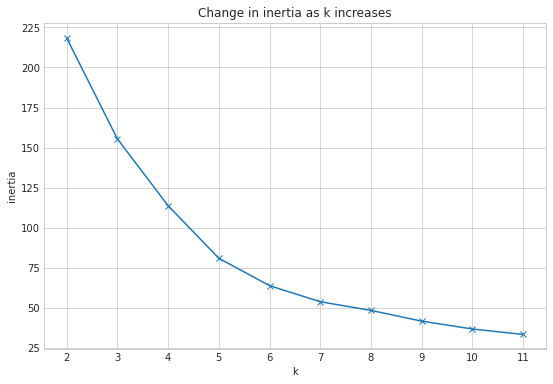

In [30]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=42).fit(house_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [33]:
# train
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(house_cluster)

train_scaled['house_cluster'] = kmeans.predict(house_cluster)
train_scaled.house_cluster = train_scaled.house_cluster.astype('category')

In [34]:
# validate
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(house_cluster_validate)

validate_scaled['house_cluster'] = kmeans.predict(house_cluster_validate)
validate_scaled.house_cluster = validate_scaled.house_cluster.astype('category')

In [62]:
train_scaled.head(1)

,bath_scaled,bed_scaled,square_feet_scaled,fullbathcnt_scaled,lot_square_feet_scaled,yearbuilt_scaled,appraisal_scaled,half_bath_scaled,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County,house_cluster
12591,0.166667,0.363636,0.096731,0.166667,0.001388,0.65942,0.008325,0.0,1151696,11281694,3.0,4.0,2338.0,3.0,34661359.0,-118159914.0,10152.0,6.037901e+07,5534.0,3101.0,97317.0,1969.0,214525.0,2016.0,0.084755,0.0,1,0,0,1


In [63]:
y = (train_scaled.logerror[train_scaled.house_cluster == 0].mean(),
      train_scaled.logerror[train_scaled.house_cluster == 1].mean(),
      train_scaled.logerror[train_scaled.house_cluster == 2].mean())

x = ['House Cluster 0', 'House Cluster 1', 'House Cluster 2']

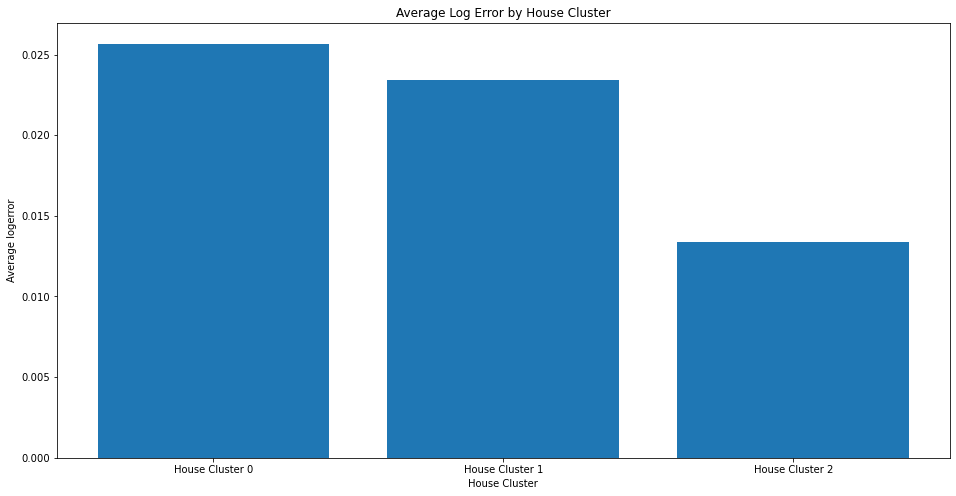

In [64]:
plt.figure(figsize=(16,8))
plt.bar(x, y)
plt.xlabel('House Cluster')
plt.ylabel('Average logerror')
plt.title('Average Log Error by House Cluster')
plt.show()

House Cluster 0 has the largest average logerror.

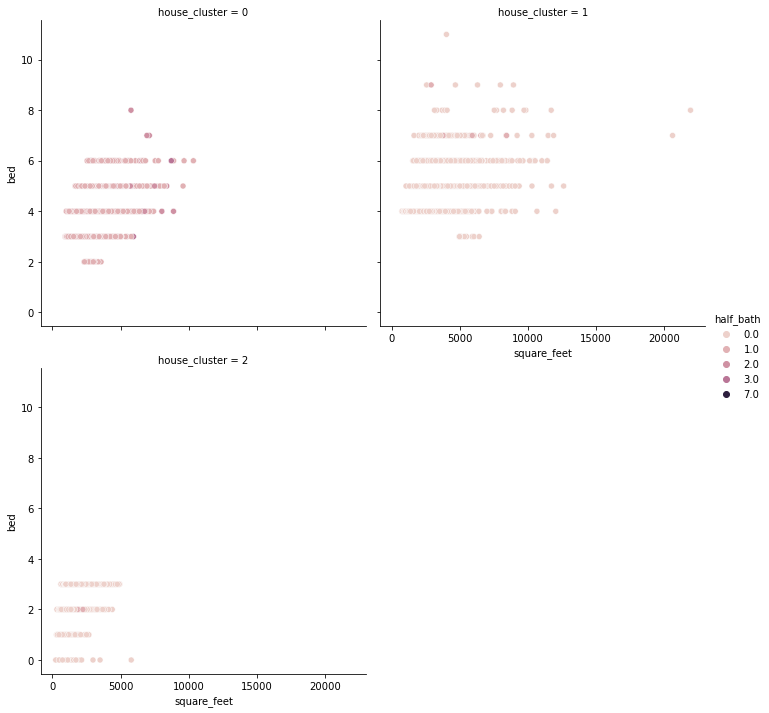

In [65]:
# UNSCALED
sns.relplot(data=train_scaled, x="square_feet", y="bed", col="house_cluster", hue="half_bath", col_wrap=2)

0. House cluster 0 seems to be medium square feet with more bedrooms and half baths. Potential name = Medium House, High Half Bath
1. House cluster 1 seems to be medium to large square feet with Medium to High number of bedrooms and Low Half Baths. Potential name = Large House, Low Half Baths.
2. House cluster 2 seems to be small square feet with low number of bedrooms and half baths.
    Potential name = Small House, Low half bath

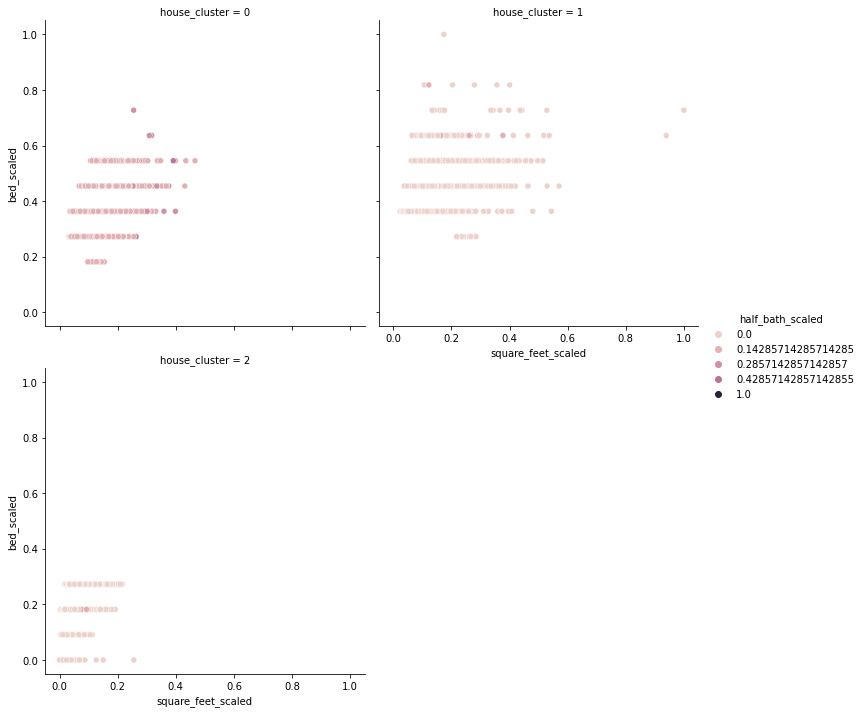

In [66]:
# SCALED
sns.relplot(data=train_scaled, x="square_feet_scaled", y="bed_scaled", col="house_cluster", hue="half_bath_scaled", col_wrap=2)

<AxesSubplot:xlabel='square_feet_scaled', ylabel='bed_scaled'>

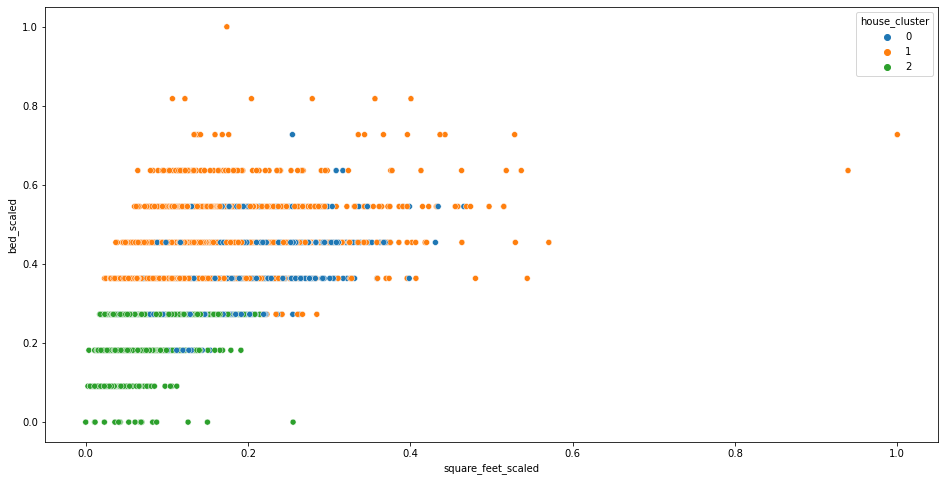

In [68]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = train_scaled, x = 'square_feet_scaled', y='bed_scaled', hue='house_cluster')

Text(0.5, 1.0, 'Cluster 0: larger high half bath, Cluster 1: larger low half bath, Cluster 2: small low half bath')

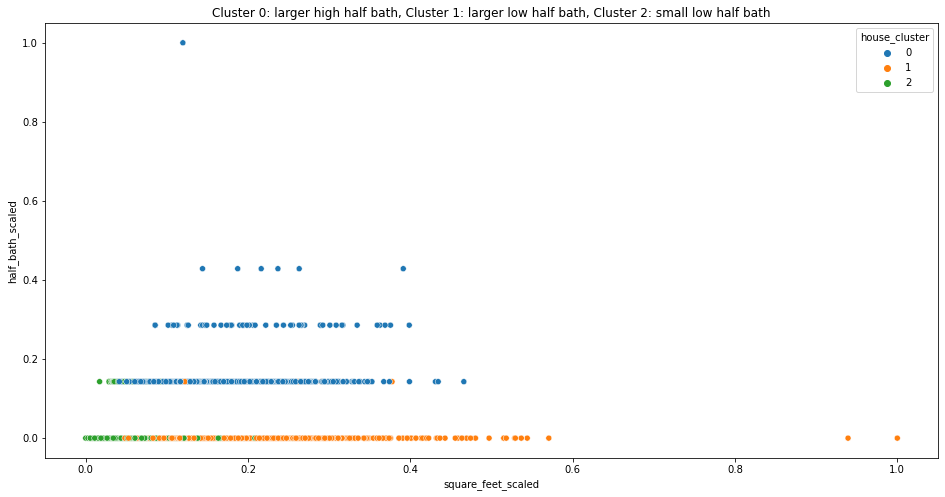

In [69]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = train_scaled, x = 'square_feet_scaled', y='half_bath_scaled', hue='house_cluster')
plt.title("Cluster 0: larger high half bath, Cluster 1: larger low half bath, Cluster 2: small low half bath")

### Age/size cluster

In [37]:
age_size_cluster_train = train_scaled[['yearbuilt_scaled', 'square_feet_scaled', 'lot_square_feet_scaled']]
k_range = range(2,20)

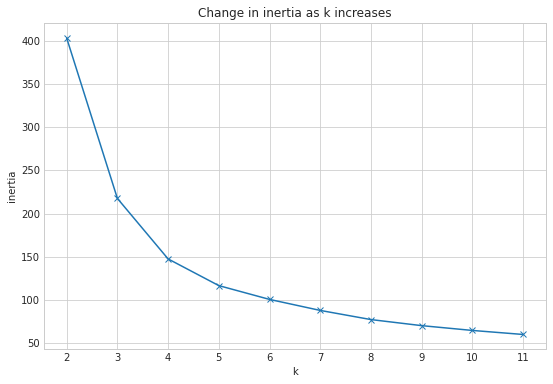

In [71]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=42).fit(age_size_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [38]:
#train
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(age_size_cluster_train)

train_scaled['age_size_cluster'] = kmeans.predict(age_size_cluster_train)
train_scaled.age_size_cluster = train_scaled.age_size_cluster.astype('category')

In [39]:
# validate

age_size_cluster_validate = validate_scaled[['yearbuilt_scaled', 'square_feet_scaled', 'lot_square_feet_scaled']]
k_range = range(2,20)

kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(age_size_cluster_validate)

validate_scaled['age_size_cluster'] = kmeans.predict(age_size_cluster_validate)
validate_scaled.age_size_cluster = validate_scaled.age_size_cluster.astype('category')

In [75]:
y = (train_scaled.logerror[train_scaled.age_size_cluster == 0].mean(),
      train_scaled.logerror[train_scaled.age_size_cluster == 1].mean(),
      train_scaled.logerror[train_scaled.age_size_cluster == 2].mean())

x = ['Age/size Cluster 0', 'Age/size Cluster 1', 'Age/size Cluster 2']

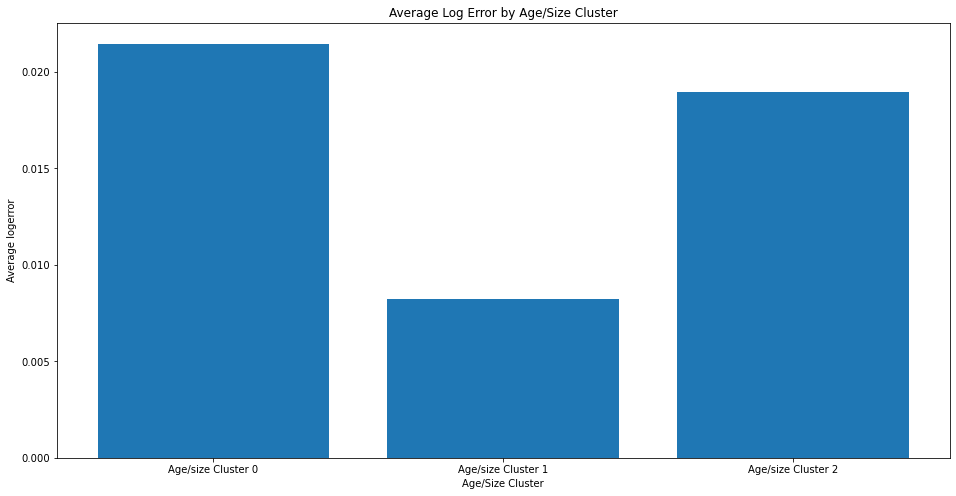

In [76]:
plt.figure(figsize=(16,8))
plt.bar(x, y)
plt.xlabel('Age/Size Cluster')
plt.ylabel('Average logerror')
plt.title('Average Log Error by Age/Size Cluster')
plt.show()

Age/size clusters 0 and 2 are higher than cluster 1.

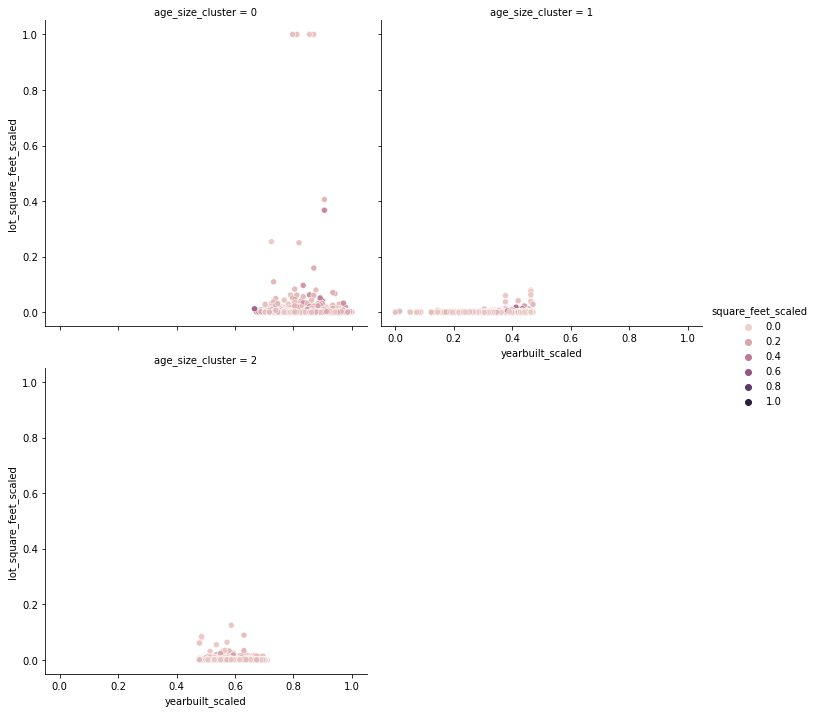

In [81]:
sns.relplot(data=train_scaled, x="yearbuilt_scaled", y="lot_square_feet_scaled", col="age_size_cluster", hue='square_feet_scaled', col_wrap=2)

0. Cluster 0 are the larger, older houses.
1. Cluster 1 are the smaller, newer houses.
2. Cluster 2 are the smaller, medium aged houses. 

### - Null Hypothesis: There is no difference in log error between the age/size clusters.

### - Alternative Hypothesis: There is a difference in log error between the age/size clusters.

In [82]:
alpha = 0.05

f, p = stats.f_oneway(train_scaled.logerror[train_scaled.age_size_cluster == 0], train_scaled.logerror[train_scaled.age_size_cluster == 1], train_scaled.logerror[train_scaled.age_size_cluster == 2])
f, p

(11.329146170825815, 1.206115264662951e-05)

Reject the null hypothesis, there is a statistically significant differance in log error between age/size clusters.

## Modeling

### Baseline

In [37]:
train_scaled.head(1)

,bath_scaled,bed_scaled,square_feet_scaled,fullbathcnt_scaled,lot_square_feet_scaled,yearbuilt_scaled,appraisal_scaled,half_bath_scaled,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County,house_cluster,age_size_cluster
12591,0.166667,0.363636,0.096731,0.166667,0.001388,0.65942,0.008325,0.0,1151696,11281694,3.0,4.0,2338.0,3.0,34661359.0,-118159914.0,10152.0,6.037901e+07,5534.0,3101.0,97317.0,1969.0,214525.0,2016.0,0.084755,0.0,1,0,0,1,2


In [41]:
dummy_df_train = pd.get_dummies(train_scaled[['house_cluster', 'age_size_cluster']])
train_scaled = pd.concat([train_scaled, dummy_df_train], axis = 1)

dummy_df_validate = pd.get_dummies(validate_scaled[['house_cluster', 'age_size_cluster']])
validate_scaled = pd.concat([validate_scaled, dummy_df_validate], axis = 1)

In [88]:
train_scaled.head()

,bath_scaled,bed_scaled,square_feet_scaled,fullbathcnt_scaled,lot_square_feet_scaled,yearbuilt_scaled,appraisal_scaled,half_bath_scaled,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County,house_cluster,age_size_cluster,house_cluster_0,house_cluster_1,house_cluster_2,age_size_cluster_0,age_size_cluster_1,age_size_cluster_2
12591,0.166667,0.363636,0.096731,0.166667,0.001388,0.659420,0.008325,0.0,1151696,11281694,3.0,4.0,2338.0,3.0,34661359.0,-118159914.0,10152.0,6.037901e+07,5534.0,3101.0,97317.0,1969.0,214525.0,2016.0,0.084755,0.0,1,0,0,1,2,0,1,0,0,0,1
2778,0.500000,0.363636,0.544008,0.500000,0.005330,0.826087,0.149392,0.0,2104743,10847031,7.0,4.0,12039.0,7.0,34167197.0,-118434181.0,37630.0,6.037129e+07,12447.0,3101.0,96410.0,1992.0,3794515.0,2016.0,0.031378,0.0,1,0,0,1,0,0,1,0,1,0,0
30932,0.083333,0.272727,0.056803,0.083333,0.000821,0.594203,0.019118,0.0,1861487,14230822,2.0,3.0,1472.0,2.0,33805416.0,-117827119.0,6200.0,6.059076e+07,33252.0,1286.0,97065.0,1960.0,488429.0,2016.0,-0.024276,0.0,0,1,0,2,2,0,0,1,0,0,1
48667,0.083333,0.272727,0.084836,0.083333,0.001596,0.710145,0.013194,0.0,1617053,12150225,2.0,3.0,2080.0,2.0,34232342.0,-118227111.0,11606.0,6.037300e+07,46080.0,3101.0,96330.0,1976.0,338082.0,2016.0,0.003152,0.0,1,0,0,2,0,0,0,1,1,0,0
5836,0.083333,0.272727,0.052930,0.083333,0.000971,0.586957,0.002350,0.0,1114046,13850784,2.0,3.0,1388.0,2.0,33944851.0,-117942074.0,7245.0,6.059001e+07,18874.0,1286.0,96186.0,1959.0,62884.0,2016.0,0.007861,0.0,0,1,0,2,2,0,0,1,0,0,1


In [42]:
validate_scaled

,bath_scaled,bed_scaled,square_feet_scaled,fullbathcnt_scaled,lot_square_feet_scaled,yearbuilt_scaled,appraisal_scaled,half_bath_scaled,id,parcelid,bath,bed,square_feet,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,half_bath,LA County,Orange County,Ventura County,house_cluster,age_size_cluster,house_cluster_0,house_cluster_1,house_cluster_2,age_size_cluster_0,age_size_cluster_1,age_size_cluster_2
44197,0.000000,0.222222,0.073761,0.000000,0.000637,0.488722,0.010455,0.0,2393021,12302820,1.0,2.0,1126.0,1.0,33940750.0,-118220611.0,4678.0,6.037536e+07,47762.0,3101.0,96125.0,1947.0,265150.0,2016.0,0.016056,0.0,1,0,0,0,0,1,0,0,1,0,0
43461,0.111111,0.333333,0.123141,0.111111,0.000823,0.578947,0.012338,0.0,1823556,11418342,2.0,3.0,1687.0,2.0,33921192.0,-118356806.0,5972.0,6.037602e+07,42150.0,3101.0,96107.0,1959.0,310048.0,2016.0,0.137172,0.0,1,0,0,0,0,1,0,0,1,0,0
19399,0.333333,0.444444,0.319338,0.333333,0.001257,0.917293,0.032594,0.0,2414836,17263461,4.0,4.0,3916.0,4.0,34263747.0,-118682712.0,8998.0,6.111008e+07,27110.0,2061.0,97116.0,2004.0,793000.0,2016.0,0.036370,0.0,0,0,1,2,1,0,0,1,0,1,0
50533,0.111111,0.444444,0.097879,0.111111,0.000683,0.676692,0.018402,0.0,1399441,14372753,2.0,4.0,1400.0,2.0,33634590.0,-117686058.0,5000.0,6.059052e+07,32380.0,1286.0,96962.0,1972.0,454616.0,2016.0,0.032161,0.0,0,1,0,2,0,0,0,1,1,0,0
24891,0.444444,0.555556,0.362908,0.444444,0.006231,0.924812,0.018626,0.0,372156,11239786,5.0,5.0,4411.0,5.0,34542642.0,-118118287.0,43672.0,6.037910e+07,40227.0,3101.0,97328.0,2005.0,459958.0,2016.0,0.017489,0.0,1,0,0,2,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,0.111111,0.333333,0.080979,0.111111,0.001001,0.646617,0.018963,0.0,2827582,12851382,2.0,3.0,1208.0,2.0,33979491.0,-117887986.0,7211.0,6.037409e+07,22827.0,3101.0,96492.0,1968.0,468000.0,2016.0,0.182098,0.0,1,0,0,0,0,1,0,0,1,0,0
19827,0.111111,0.444444,0.129830,0.111111,0.006198,0.781955,0.002164,0.0,1793250,11242226,2.0,4.0,1763.0,2.0,34494908.0,-118159875.0,43444.0,6.037911e+07,16677.0,3101.0,97298.0,1986.0,67465.0,2016.0,-0.026999,0.0,1,0,0,2,1,0,0,1,0,1,0
50376,0.111111,0.333333,0.076226,0.111111,0.000986,0.578947,0.007390,0.0,2248404,14063188,2.0,3.0,1154.0,2.0,33696326.0,-117984848.0,7110.0,6.059099e+07,25218.0,1286.0,96964.0,1959.0,192067.0,2016.0,0.058211,0.0,0,1,0,0,0,1,0,0,1,0,0
28971,0.111111,0.333333,0.137488,0.111111,0.001322,0.578947,0.016245,0.0,2806016,11053574,2.0,3.0,1850.0,2.0,34230420.0,-118477226.0,9449.0,6.037117e+07,12447.0,3101.0,96369.0,1959.0,403194.0,2016.0,-0.002942,0.0,1,0,0,0,0,1,0,0,1,0,0


In [43]:
y_train = train_scaled.logerror
y_validate = validate_scaled.logerror
y_test = test_scaled.logerror

x_train = train_scaled.drop(columns=['logerror'])
x_validate = validate_scaled.drop(columns=['logerror'])
x_test = test_scaled.drop(columns=['logerror'])

In [44]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [45]:
# baseline predictor
y_train.logerror.mean()

0.01797354929457556

In [46]:
y_train['baseline'] = y_train.logerror.mean()
y_validate['baseline'] = y_validate.logerror.mean()

In [47]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [102]:
rmse_train_baseline = mean_squared_error(y_train.logerror, y_train.baseline)**(1/2)
rmse_validate_baseline = mean_squared_error(y_validate.logerror, y_validate.baseline)**(1/2)
print(rmse_train, rmse_validate)

0.17399889316814268 0.18727602422316578


## Feature Engineering

### Select K Best

In [49]:
kbest = SelectKBest(f_regression, k=4)

kbest.fit(x_train, y_train.logerror)

SelectKBest(k=4, score_func=<function f_regression at 0x148a8d550>)

In [50]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=x_train.columns)
kbest_results

,p,f
bath_scaled,1.546296e-11,45.504493
bed_scaled,3.202680e-12,48.594440
square_feet_scaled,2.375928e-14,58.241947
fullbathcnt_scaled,1.972156e-10,40.517800
lot_square_feet_scaled,3.299100e-02,4.546602
yearbuilt_scaled,1.605188e-05,18.613473
appraisal_scaled,7.053406e-01,0.142978
half_bath_scaled,1.495584e-03,10.085628
id,5.990331e-01,0.276462
parcelid,6.296330e-02,3.457774


In [51]:
x_train.columns[kbest.get_support()]

Index(['bed_scaled', 'square_feet_scaled', 'bed', 'square_feet'], dtype='object')

In [52]:
x_train_model1 = x_train[['bed_scaled', 'square_feet_scaled', 'bed', 'square_feet']]

In [53]:
x_validate_model1 = x_validate[['bed_scaled', 'square_feet_scaled', 'bed', 'square_feet']]

In [67]:
x_train_model2 = x_train[['house_cluster_0', 'house_cluster_1', 'house_cluster_2']]
x_validate_model2 = x_validate[['house_cluster_0', 'house_cluster_1', 'house_cluster_2']]

In [57]:
x_train_model3 = x_train[['age_size_cluster_0', 'age_size_cluster_1', 'age_size_cluster_2']]
x_validate_model3 = x_validate[['age_size_cluster_0', 'age_size_cluster_1', 'age_size_cluster_2']]

### Linear Regression (OLS)

### Model 1

In [58]:
lm = LinearRegression(normalize=True)

In [59]:
lm.fit(x_train_model1, y_train.logerror)

LinearRegression(normalize=True)

In [60]:
y_train['log_error_pred_lm_model1'] = lm.predict(x_train_model1)

In [61]:
rmse_train = mean_squared_error(y_train.logerror, y_train.log_error_pred_lm_model1)**(1/2)

In [62]:
y_validate['log_error_pred_lm_model1'] = lm.predict(x_validate_model1)

In [63]:
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.log_error_pred_lm_model1)**(1/2)

In [77]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.173916916092889 
Validation/Out-of-Sample:  0.18763017414420122


### Model 2

In [65]:
lm = LinearRegression(normalize=True)

In [68]:
lm.fit(x_train_model2, y_train.logerror)

LinearRegression(normalize=True)

In [69]:
y_train['log_error_pred_lm_model2'] = lm.predict(x_train_model2)

In [79]:
rmse_train = mean_squared_error(y_train.logerror, y_train.log_error_pred_lm_model2)**(1/2)

In [71]:
y_validate['log_error_pred_lm_model2'] = lm.predict(x_validate_model2)

In [80]:
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.log_error_pred_lm_model2)**(1/2)

In [81]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.173916916092889 
Validation/Out-of-Sample:  0.18763017414420122


### Model 3

In [82]:
lm = LinearRegression(normalize=True)

In [83]:
lm.fit(x_train_model3, y_train.logerror)

LinearRegression(normalize=True)

In [84]:
y_train['log_error_pred_lm_model3'] = lm.predict(x_train_model3)

In [85]:
rmse_train = mean_squared_error(y_train.logerror, y_train.log_error_pred_lm_model3)**(1/2)

In [86]:
y_validate['log_error_pred_lm_model3'] = lm.predict(x_validate_model3)

In [87]:
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.log_error_pred_lm_model3)**(1/2)

In [88]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.17394356235793906 
Validation/Out-of-Sample:  0.1874917089980152


### Lasso Lars

### Model 1

In [89]:
lars = LassoLars(alpha=1.0)

In [90]:
lars.fit(x_train_model1, y_train.logerror)

LassoLars()

In [91]:
y_train['pred_lars'] = lars.predict(x_train_model1)

In [92]:
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lars)**(1/2)

In [93]:
y_validate['pred_lars'] = lars.predict(x_validate_model1)

In [94]:
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.pred_lars)**(1/2)

In [95]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.17399889316814268 
Validation/Out-of-Sample:  0.1872760414823965


### Model 2

In [96]:
lars.fit(x_train_model2, y_train.logerror)

y_train['pred_lars2'] = lars.predict(x_train_model2)
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lars2)**(1/2)

y_validate['pred_lars2'] = lars.predict(x_validate_model2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.pred_lars2)**(1/2)

In [97]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.17399889316814268 
Validation/Out-of-Sample:  0.1872760414823965


### Model 3

In [103]:
lars.fit(x_train_model3, y_train.logerror)

y_train['pred_lars3'] = lars.predict(x_train_model3)
rmse_train = mean_squared_error(y_train.logerror, y_train.pred_lars3)**(1/2)

y_validate['pred_lars3'] = lars.predict(x_validate_model3)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.pred_lars3)**(1/2)

In [104]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.17399889316814268 
Validation/Out-of-Sample:  0.1872760414823965


### Model Conclusion

In [105]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     'Baseline RMSE\nTraining/In-Sample: ', rmse_train_baseline,
     '\nValidation/Out-of-Sample: ', rmse_validate_baseline)

RMSE for Lasso + Lars
Training/In-Sample:  0.17399889316814268 
Validation/Out-of-Sample:  0.1872760414823965 Baseline RMSE
Training/In-Sample:  0.17399889316814268 
Validation/Out-of-Sample:  0.18727602422316578


Baseline was better.